# Titanic Survival Analysis

**Intro**:
As the movie Titanic one of my favorites, I was attracted by this topic immediately when I saw it. While the movie itself is touching and romantic, the actualy historic event was an astounding tradegy. Ironically against the claim as a safest ship ever, the Titanic carried only 20 boats in contrast with the supposed 64, and the lack of emergency training made the situation even worse. In the end, only one third of 2,200 passengers and crew were saved and survived from its sinking. 
> **Questions**:
Looking through the records, a very interesting question to ask is during the last critical 160 minutes,  what composed the final answer of the Titanic people, to the choice question of life and death. In the movie, women ,children and pasengers were given the priority of the 20 life-saving boats, survived at the great sacrifice of brave men, parents and crews. With the dataset at hand and many reports as references, **we will start with the most likely factors such as gender,status and age**, and try to re-establish the Titanic story from another perspective, by numbers and statistics, and decompose the most difficult choice.


# 1.Data wrangling
Actually there is nothing much to wrangle with as the given dataset is already pretty clean and ready to use. So I just did little preparatin work including checking and handling missing values,and creating a overview about the dataset. 

In [1]:
#import all necessary modules
import csv
import pandas as pd
import numpy as np

from IPython.display import display
from scipy import stats

import seaborn as sns

import os
import matplotlib.pyplot as plt
%matplotlib inline

os.chdir(r'C:\Users\13913\Desktop\OneDrive\python_rescourses\DAND\P2')



In [2]:
#input the raw file
alldata='titanic-data.csv'
data=pd.read_csv(alldata)

In [3]:
#display top 5 rows and create an overview of the whole dataset
display(data.head())
print data.describe()

,PassengerID,Survived,Pclass,name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


       PassengerID    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000         NaN    0.000000   
50%     446.000000    0.000000    3.000000         NaN    0.000000   
75%     668.500000    1.000000    3.000000         NaN    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            ParCh        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


c:\python27\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [4]:
#input the raw file
data=pd.read_csv(alldata)

#check any missing values
data.isnull().sum()


PassengerID      0
Survived         0
Pclass           0
name             0
Sex              0
Age            177
SibSp            0
ParCh            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we can see, 9 out of 12 of the fields are complete such as PassengerID,Pclass, Survived and so on. It's especially important to see **Survived column is complete** since it is the main parameter we are interested to study with. If any of rows lack this field we can't help but to drop the row. So we are happy. And missing values in columns Cabin and Embarked just don't bother us since we are not interested in them now. The missing values in Age, might disrupt some functionality, but we can simply use dropna() if that is the case. To make full advantage of the data size, it's good to keep the data size as it is.

**First Impression**:
Let's form a quick first impression about the passenger infomation: frist of all, among the recorded 891 people only 342 survived, with a mean probility 0.3838; more than half of the passengers on the luxary ship were from lower class, while the upper class took up only one fourth, which is surprising to me; male passengers were 1.8 times of female passengers; the mean age of passengers was 29.7, fairly young, with std of 14.5 (i.e., approximately 68% passengers were 14.9 to 43.9 years old); based on SibSp and Parch info, more than half of passengers traveled without direct relatives; finally, 3/4 of people embarked on Southampton, the departure point, and the last 77 passengers embarked on the Queenstown,Ireland. 
We have in total 891 records and 12 variables. The 'Survived' variable is the one what we are most interested in. To finally dissect the components from it, we need choose some promising starting points first. 

>**Notice**:
Noticebly, 891 records here only covers 0.4 of actuall 2200 people on board. It is important to ask, why did this specific share of infomation get collected here, not else? Was the collection biasly carried out? Or further, is the analysis based on the imcomplete dataset applicable on actual population at all? Well, based on independent reports about the accident,such as  [Titanic Facts](http://www.titanicfacts.net/),[Eyewitness to Titanic](http://www.eyewitnesstohistory.com/titanic.htm), the overal gender and survival rate description of 2200 corresponds nicely with what we get here. Therefore I think our this dataset is generally representative and our analysis based on should be solid and relevant.

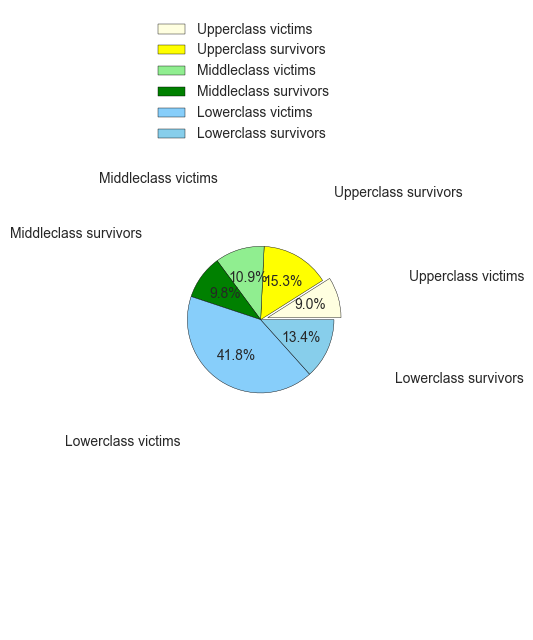

In [5]:

#use pie chart to show the relative percentage of surivors and victims from each of class
plt.figure(figsize=(2,8))
labels = [u'Upperclass victims',u'Upperclass survivors',
          u'Middleclass victims',u'Middleclass survivors', 
          u'Lowerclass victims',u'Lowerclass survivors']
nums=data.groupby(["Pclass","Survived"]).size()
sizes=[num/1./sum(nums)*100 for num in nums]
colors = ['lightyellow','yellow','lightgreen','green','lightskyblue','skyblue']
explode = (0.1,0,0,0,0,0)

plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct = '%3.1f%%',labeldistance=2)
plt.axis('equal')
plt.legend()
plt.show()


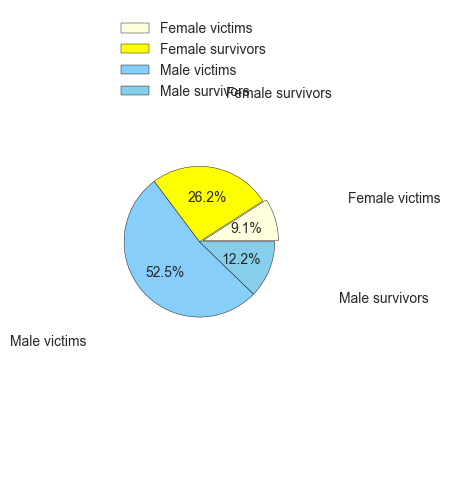

In [6]:
#use pie chart to show the relative percentage of surivors and victims from each of class
plt.figure(figsize=(2,6))
labels = [u'Female victims',u'Female survivors',
          u'Male victims',u'Male survivors']

nums=data.groupby(["Sex","Survived"]).size()
sizes=[num/1./sum(nums)*100 for num in nums]
colors = ['lightyellow','yellow','lightskyblue','skyblue']
explode = (0.05,0,0,0)

plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct = '%3.1f%%',labeldistance=2)
plt.axis('equal')
plt.legend()
plt.show()

# 2. What contributes to the accident survival and how?

## 2.1 Hypothesis
Here we pick **3 independent variables** that most likely to have a role to play, according to Titanic movie, accident reports as well as based on our own summarizing. They are 'Sex', 'Pclass',and 'Age'. Let's first **assume** no intertangling between the 3 and no lurking factors besides them.As I mentioned before 'Survied' is the **dependent variable** we would like to look at. Therefore, we get 3 candidate hypothesis:
**Hypothesis I:** 'Sex' factor has an effect on survival;
**Hypothesis II:**'Pclass' factor has an effect on survival;
**Hypothesis III**: 'Age' factor  has an effect on survival.


In [7]:
#filter function block which would be used later on
#code in this block is borrowed from P0 file "babs_visualizations.py" with adaptive modifications
def filter_data(data, condition):
    field, op, value = condition.split(" ", 2)
    if field not in data.columns.values:
        raise Exception("'{}' is not a feature of the dataframe. Did you spell something wrong?".format(field))
    try:
        value = float(value)
    except:
        value = value.strip("\'\"")

    # get booleans for filtering
    if op == ">":
        matches = data[field] > value
    elif op == "<":
        matches = data[field] < value
    elif op == ">=":
        matches = data[field] >= value
    elif op == "<=":
        matches = data[field] <= value
    elif op == "==":
        matches = data[field] == value
    elif op == "!=":
        matches = data[field] != value
    else:  # catch invalid operation codes
        raise Exception("Invalid comparison operator. Only >, <, >=, <=, ==, != allowed.")

    # filter data and outcomes
    data = data[matches].reset_index(drop=True)
    return data

## 2.2 Intuitive observation

### Is hypothesis  correct at first glance?

In [8]:
#hypothesis one: sex factor counts
print '------------'
print data.groupby(['Survived','Sex']).size()

#hypothesis two:class factor counts
print '------------'
print data.groupby(['Survived','Pclass']).size()


------------
Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64
------------
Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64




### Hypothesis I:Yes!
Among 342 survivors females were 2.1 times of males despite males were actually 1.8 times of them on board! That means the  likely hood of survival of females were 3.8 times of that of male. 

### Hypothesis II: Yes!
Upper class has least number in victims and greatest number in survivors while its size was slightly bigger than medium class and just half of lower class.


In [9]:
#hypothesis three: age factor counts
print '------------'
survivors=filter_data(data,'Survived == 1')
victims=filter_data(data,'Survived == 0')

a=survivors['Age'].dropna().values
b= victims['Age'].dropna().values

print 'Mean Age for Survivors:{}    \nMean Age for Victims:{}'.format(a.mean(),b.mean())

------------
Mean Age for Survivors:28.3436896552    
Mean Age for Victims:30.6261792453



### Hypothesis III: not convincing, what next?
The mean age difference between survivors and victims is only -2.3,  it's neither very convincing nor indicating total unrelationship. We need to do some simple t-test and linear regression to extend and solidify the observation we got here. And hopefully from there we can get some insights about what happened with Age factor as well. 

# 2.3 Diving into dataset
## 2.3.1 Use Chi-square to examine hypothesis

>**How does Sex factor play in deciding chance of survival?**
  
H0: no relationship between gender and survival chance.  
H1:relashitionship between gender and survival chance.   
critical p value: 0.01.  

Result: p value =1.19735706278e-58  
Conclusion: H0 rejected. Survival chance is dependent on gender.  

In [10]:
# Chi-Squared Tests
#H0: no relationship between gender and survival chance
#H1:relashitionship between gender and survival chance
#critical p value: 0.01

from scipy.stats import chi2_contingency
print "Results of Chi-Squared test on Sex to Survival. \n"

pivot = pd.pivot_table( data[['Survived', 'Sex']], index = 'Survived', columns = ['Sex'], aggfunc = len)
pivot
print pivot,"\n"
chi2, p_value, dof, expected = chi2_contingency(pivot)

print "Does Sex have a significant effect on Survival?"
print "Chi-Squared Score = " + str(chi2)
print "Pvalue = " + str(p_value) +"\n"

Results of Chi-Squared test on Sex to Survival. 

Sex       female  male
Survived              
0             81   468
1            233   109 

Does Sex have a significant effect on Survival?
Chi-Squared Score = 260.717020167
Pvalue = 1.19735706278e-58



>**How does Pclass factor play in influencing chance of survival?**  

H0: no relationship between Pclass and survival chance.  
H1:relashitionship between Pclass and survival chance.   
critical p value: 0.01.  

Result: p value = 4.5492517113e-23   
Conclusion: H0 rejected. Survival chance is dependent on Pclass.  


In [11]:
# Chi-Squared Tests
#H0: no relationship between status and survival chance
#H1:relashitionship between status and survival chance
#critical p value: 0.01

print "Results of Chi-Squared test on Pclass to Survival. \n"

pivot = pd.pivot_table( data[['Survived', 'Pclass']], index = 'Survived', columns = ['Pclass'], aggfunc = len)
pivot
print pivot,"\n"
chi2, p_value, dof, expected = chi2_contingency(pivot)

print "Does Pclass have a significant effect on Survival?"
print "Chi-Squared Score = " + str(chi2)
print "Pvalue = " + str(p_value) +"\n"

Results of Chi-Squared test on Pclass to Survival. 

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119 

Does Pclass have a significant effect on Survival?
Chi-Squared Score = 102.888988757
Pvalue = 4.5492517113e-23



**'Age' factor**:
t-test and LR indicates slightly negative corelation between age and survival. While the  P value, especially in one-tail unpaired t-test, almost sits right on the critical level. Besides, the correlation percentage of age to survival is even lower than Pclass with Sex. 

H0: no relationship between age and survival chance.  
H1:relashitionship between age and survival chance.  
critical p value: 0.01.  

Result: p value =0.0541902389069  
Conclusion: Fail to reject H0. No significant dependence of survival chance on age.  

In [12]:
# Chi-Squared Tests
#H0: no relationship between age and survival chance
#H1:relashitionship between age and survival chance
#critical p value: 0.01

print "Results of Chi-Squared test on Age to Survival. \n"
# create new variable: Ischildren, cutoff is set at 18
data["Ischildren"]=data["Age"]<18
newdata=data.dropna()
pivot = pd.pivot_table( newdata[['Survived', 'Ischildren']], index = 'Survived', columns = ['Ischildren'], aggfunc = len)
pivot
print pivot,"\n"
chi2, p_value, dof, expected = chi2_contingency(pivot)

print "Does Age have a significant effect on Survival?"
print "Chi-Squared Score = " + str(chi2)
print "Pvalue = " + str(p_value) +"\n"

Results of Chi-Squared test on Age to Survival. 

Ischildren  False  True 
Survived                
0              58      2
1             106     17 

Does Age have a significant effect on Survival?
Chi-Squared Score = 3.706829327
Pvalue = 0.0541902389069



>**What Next**: The probability is bigger than 1% which means we fail to reject H0 hypothesis, but since it's quite close to critical value the probabiliy of occurance of type II error is high. Besides we can't exclude probability of lurking variable which might play down or up the effect of age factor. let's do some visualizations to help decide whether children are given priority in survival. 

## 2.3.2 Use histogram visualization to probe lurking variable


In [13]:

#histogram visualization block
#code in this block is borrowed from P0 file "babs_visualizations.py" with adaptive modifications
    
def usage_plot(data, key='', filters=[], title="Number of People",**kwargs):
    if not key:
        raise Exception("No key has been provided. Make sure you provide a variable on which to plot the data.")
    if key not in data.columns.values:
         raise Exception("'{}' is not a feature of the dataframe. Did you spell something wrong?".format(key))
        
    for condition in filters:
        data = filter_data(data, condition)
    
    plt.figure(figsize=(8, 6))
    
    if kwargs and 'n_bins' in kwargs and 'bin_width' in kwargs:
        raise Exception("Arguments 'n_bins' and 'bin_width' cannot be used simultaneously.")    
    
    min_value = data[key].min()
    max_value = data[key].max()
    value_range = max_value - min_value
    
    n_bins = 10
    bin_width = float(value_range) / n_bins

    if kwargs and 'n_bins' in kwargs:
        n_bins = int(kwargs['n_bins'])
        bin_width = float(value_range) / n_bins
    elif kwargs and 'bin_width' in kwargs:
        bin_width = kwargs['bin_width']
        n_bins = int(np.ceil(float(value_range) / bin_width))

    if kwargs and 'boundary' in kwargs:
        bound_factor = np.floor((min_value - kwargs['boundary']) / bin_width)
        min_value = kwargs['boundary'] + bound_factor * bin_width
        if min_value + n_bins * bin_width <= max_value:
            n_bins += 1

    bins = [i * bin_width + min_value for i in range(n_bins + 1)]

    # plot the data
    plt.hist(data[key], bins=bins)

    # Common attributes for plot formatting
    key_name = ' '.join([x.capitalize() for x in key.split('_')])
    plt.xlabel(key_name)
    plt.ylabel("Number of People")
    plt.title(title)
    plt.show()



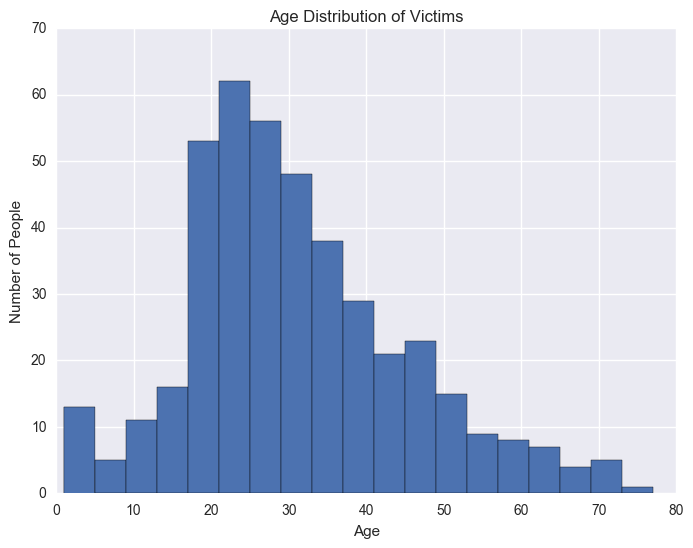

In [14]:
#visualize the age distribution of victims
usage_plot(data,'Age',['Age > 0', 'Survived == 0'],title='Age Distribution of Victims',bin_width=4)


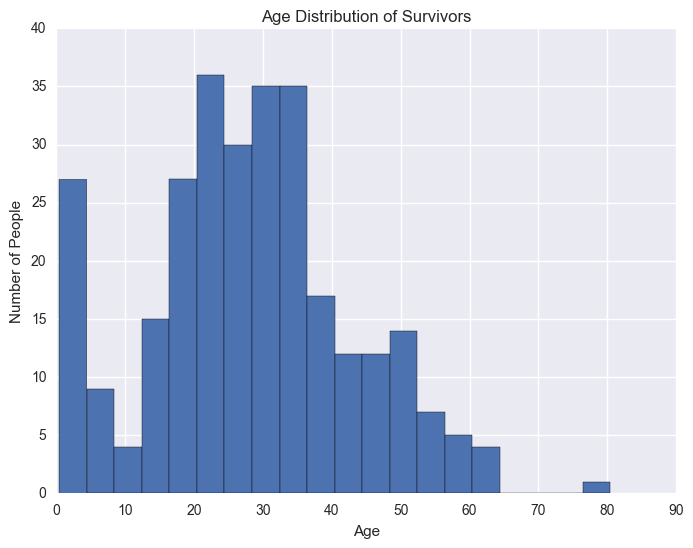

In [15]:
#visualize the age distribution of survivors
usage_plot(data,'Age',['Age > 0','Survived == 1'],title='Age Distribution of Survivors',bin_width=4)

### New land
Feel the age distribution of survivors slightly more positive skewed than the victims'... **Wait, there is something unsual:** a unseen bar on the most left side (indicating babies and infants) **jump out** in the survivors distribution. Let's zoom in a little bit. To maintain a satisfying sample size, set the age cutoff as 24.

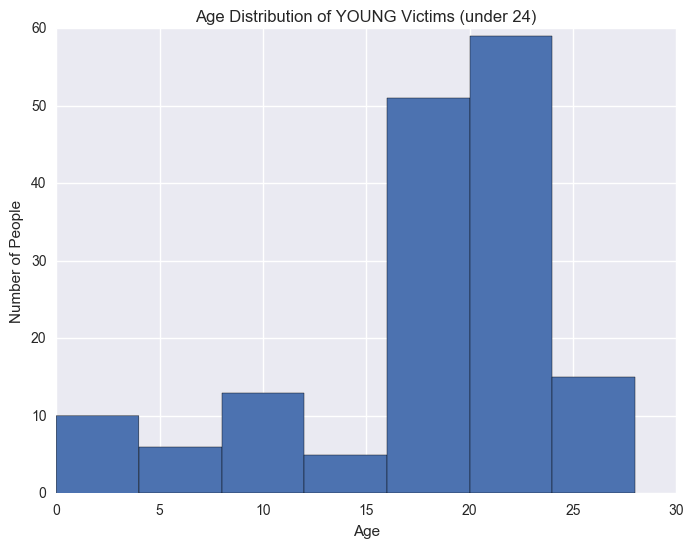

In [16]:
#visualize the age distribution of young victims
usage_plot(data,'Age',['Age <= 24','Survived == 0'],title='Age Distribution of YOUNG Victims (under 24)',bin_width=4,boundary=0)


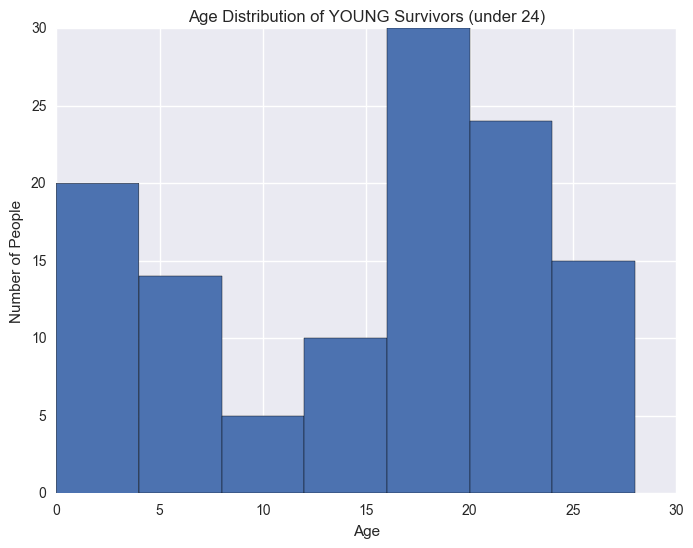

In [17]:
#visualize the age distribution of yong survivors
usage_plot(data,'Age',['Age <= 24','Survived == 1'],title='Age Distribution of YOUNG Survivors (under 24)',bin_width=4,boundary=0)

### Gotcha
Aha! Now we might know which part of Age region does the **weak negative correlation** come from! But apparently infants and babies can't defend against the accident by themselve. What would I interpret that? Did I omit anything?-The existance of **family members**! It is human nature for parents to fight for every probility to secure the safety of their children. If that is the case, we shall see distinct survival pattern between children staying with parents and children who not.

>**Statistics**  

H0: p1>p2, survival probability of children traveling with parents is significantly greater than those without parents.
H1:p1< p2 or p1 = p2, survival probability of children traveling with parents is not significantly greater than those without parents.   
critical p value: 0.01.  

Result: p value =1.33268843039e-05  
Conclusion: H0 rejected.   
Survival probability of children traveling with parents is significantly greater than those without parents.

In [18]:
#comparche the survival chance between children with parchents and children without parchents
import math

children=filter_data(data,'Age < 24')
children_noparch=filter_data(children,'ParCh == 0')
children_parch=filter_data(children,'ParCh > 0')
print 'Among {} passengers whose age <24, {} of them are with their parchents, {} of them without\n'. format(len(children),len(children_parch),len(children_noparch))
size_parch=children_parch.groupby("Survived").size()
size_noparch=children_noparch.groupby("Survived").size()
print "Children traveling with their parents:\n"
print size_parch
print "Children traveling without their parents:\n"
print size_noparch

#H0:p1=p2, no statistically signifcant difference between survival probability  between children with and without parents
#calculate proportions and difference
parchS,parchV,parch,noparchS,noparchV,noparch=size_parch[1],size_parch[0],sum(size_parch),size_noparch[1],size_noparch[0],sum(size_noparch)
p1=parchS/1./parch
p2=noparchS/1./noparch
p=(parchS+noparchS)/1./(parch+noparch)
d=p1-p2

import  scipy.stats
#calculate standard error and z value
#critical z value is set at +1.96, with corresponding p value = 0.05
sd=math.sqrt(p*(1-p)*(1./parch+1./noparch))
z=d/sd

print "----------The critical p value is 0.01." 
print "The calculated z value is " +  str(z)
p = scipy.stats.norm.sf(abs(z))
print "The calculated p value is " +  str(p)



Among 247 passengers whose age <24, 103 of them are with their parchents, 144 of them without

Children traveling with their parents:

Survived
0    44
1    59
dtype: int64
Children traveling without their parents:

Survived
0    100
1     44
dtype: int64
----------The critical p value is 0.01.
The calculated z value is 4.20032026502
The calculated p value is 1.33268843039e-05


**Null hypothesis rejected**: caculated Z value is 4.20003. Corresponding P[one-tail]=0.00001343862564560838. Therefore we can conclude that children traveling with parents are more likely to survive comparing with children who didn't. According our previous analysis, age factor ifself doesn't show strong influence on survival rate. However it is the interaction between "Age" and "Parch" that have significant effect on children's survival.  
Some might doubt about the seemingly arbitrarily chosen of age region, as 24 years old independent adults are included and treated as infants and babies who benefited from help of parents. However as I said,  parents tend to take care of their children, but since the paramether 'Parch' intangles the parent and child we can't test our hypothesis directly. 24 years old, first of all, is a safe guess below which one will more likely assume the role of an offspring instead of parent and became a help receiver. Secondly, although didn't show here, several other cutoffs such as 14,18,and 21 are also tried , all of them rejected H0 hypothesis, which means this conclusion hold very tight. However I decided on 24 since it gives the best sample size  to reduce random error. 

### Age dependent contribution:
If our speculation hold true, children are solely help receiver from their parents, then parents with their children onboard must not have higher survival rate than those traveled alone. And the results are just as expected. If we set the cutoff to Age > 40, which is the supposed parents group, the benefits from traveling together with direct relatives vanished. The contribution of "Parch" to surivival rate is highly age dependent.   

>**Statistics**  

H0: p1=p2, no statistically signifcant difference between survival probability  between parents with and without children
H1:p1!=p2, statistically signifcant difference is found between survival probability  between parents with and without children  
critical p value: 0.01.  

Result: p value =0.437078099739  
Conclusion: Fail to reject H0.   
No statistically signifcant difference is found between survival probability  between parents with and without children.


In [19]:

parent=filter_data(data,'Age > 40')
parent_noparch=filter_data(parent,'ParCh == 0')
parent_parch=filter_data(parent,'ParCh > 0')
print 'Among {} passengers whose age > 40, {} of them are with their child, {} of them without\n'. format(len(parent),len(parent_parch),len(parent_noparch))
size_parch=parent_parch.groupby("Survived").size()
size_noparch=parent_noparch.groupby("Survived").size()
print "Parents traveling with their children:\n"
print size_parch
print "Parents traveling without their children:\n"
print size_noparch


#H0:p1=p2, no statistically signifcant difference between survival probability  between parents with and without children
#calculate proportions and difference
parchS,parchV,parch,noparchS,noparchV,noparch=size_parch[1],size_parch[0],sum(size_parch),size_noparch[1],size_noparch[0],sum(size_noparch)
p1=parchS/1./parch
p2=noparchS/1./noparch
p=(parchS+noparchS)/1./(parch+noparch)
d=p1-p2
    
#calculate standard error and z value
#critical z value is set at +1.96, with corresponding p value = 0.05
sd=math.sqrt(p*(1-p)*(1./parch+1./noparch))
z=d/sd
print "----------The critical p value is 0.01." 
print "The calculated z value is " +  str(z)
p = scipy.stats.norm.sf(abs(z))*2
print "The calculated p value is " +  str(p)



Among 150 passengers whose age > 40, 33 of them are with their child, 117 of them without

Parents traveling with their children:

Survived
0    19
1    14
dtype: int64
Parents traveling without their children:

Survived
0    76
1    41
dtype: int64
----------The critical p value is 0.01.
The calculated z value is 0.777136740241
The calculated p value is 0.437078099739


# 3. Conclusion


Based on preliminary knowledge from movie, biography, and reports, an outline of the sinking accident is firstly depicted and the key dependent variable "Survived" is proposed. Combining with the quick summary of the dataset at hand we located 3 most likely canditates in survival determination: Sex, Pclass, and Age. Pandas describe() function and pie chart visualization confirm that the two variables ,Sex and Pclass, are indeed very strong determinants. And the two variables are find corelated. The role of Age, however, is bit subtle and hard to confirm at the begining.But in visualizations we find a lurking variable, 'Parch', cooperative with Age in survival chance determining. By using 'Age > 40' as control group(parents), we validate this hypothesis and prove the **interaction between Age and Parch**, is another important factor.  
However, we must also keep in mind conclusion draw here is based on assumptions and incomplete. On one hand the given dataset covered only one third of the personal, leaving the question open whether it's representative enough; on the other hand, how  these factors, Age, Pclass and Age-Parch, mathematically decide survival rate, that is, predict the survival rate, is unclear.
